# Ensemble Learning and Random Forest

## Introduction

 Ensemble method combines multiple individual models together to improve the overall performance of the algorithm. It generates more stable and accurate prediction. It can be works with both regression and classification tasks. Ensemble learning assumes that all the predictions are completely independent. 

#### One of simple ensemble learning techniques - Hard Voting Classifier

In classification, we could use a simple majority vote, "Hard Voting Classifier". Multiple models are used to make predictions for each data point, and the predictions by each model are considered as a separate vote. The prediction which got from majority of the models would be selected as the final prediction.

<img src="Image/hard-voting-classifier.png" alt="Drawing" style="width: 500px;"/>


Besides Hard voting classifier, the averaging and weighted averaging techniques are also used in the ensemble learning. 

#### Bagging (Bootstrap Aggregation)

Bagging can be used to reduce the variance of a decision tree. Bagging draws multiple subsets from the original dataset, selecting observations with replacement. Each methods trains the random subset and returns its prediction. Similar to hard voting classifier, the bagged algorithm takes the class with most votes as the final prediction. 

Each learner might has a higher bias than the one trains the original dataset, however, the aggregation of the learners would reduce both bias and variance.
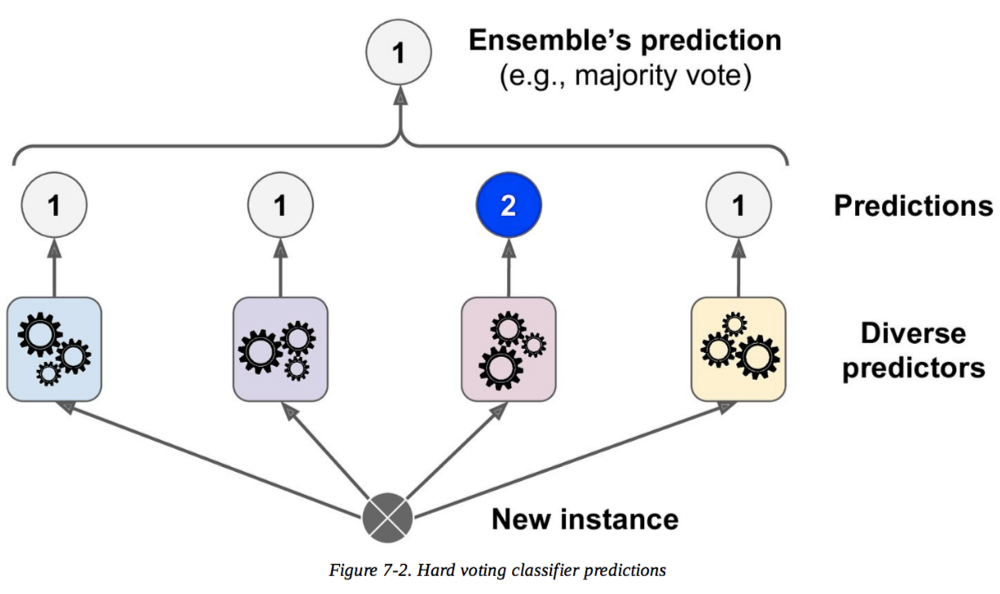

### Random Forest

One of the most popular ensemble learning techniques is Random Forest, which is also an extension over bagging.

In nature, a group of trees makes a forest. Just like its name, an ensemble of decision trees is a random forest. In random forest, multiple subsets are generated from the training dataset and trained by a group of dicision tree classifiers to make individual predictions according to the different subsets of the training data; Each tree votes, and the prediction with the most votes would be selected as the final prediction.

<img src="Image/random-forest-classifier.jpeg" alt="Drawing" style="width: 500px;"/>


Random forest decides where to split based on a random selection of features. Since each tree splits based on different features, random forest implements a level of differentiation, which provides a greater ensemble to aggregate over, and thus, producing a more accurate predictor. However, random forest needs more resources for computation and takes more time.
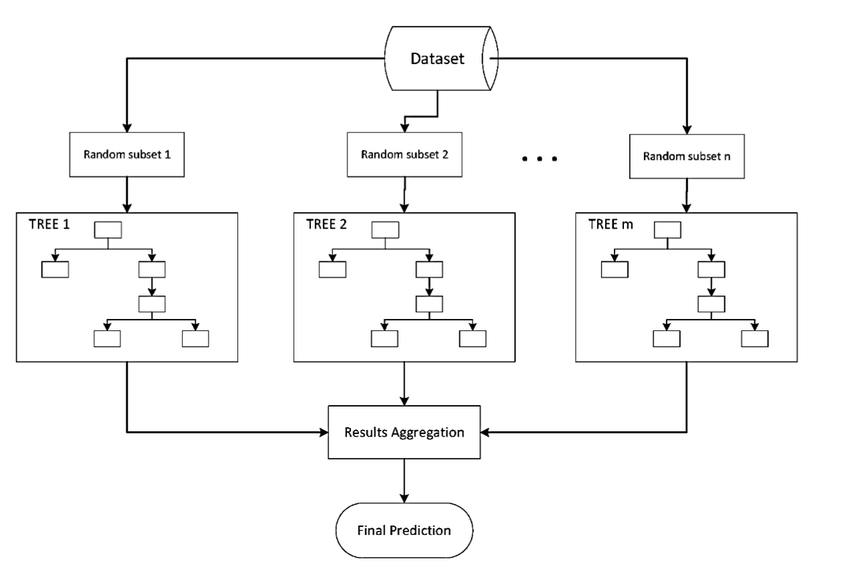

---

## Implement

The following notebook implement the ensemble learning algorithms for species classification using the [Penguin dataset](https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris). The three ensemble learning models will be used:

* Random forest

* Multilayer Perceptron, Logistic Regression, and Random Forest algorithms will be combined together, and the hard voting classifier will be used to select the final prediction. 

* Multiple decision trees will be constructed using bagging strategy.

* Multiple MLP will be constructed using bagging strategy.

### About the dataset

The dataset consists of 344 rows and 7 columns. There are three different species of penguins: Chinstrap, Adélie, and Gentoo penguins. The columns are:

* species: penguin species (Chinstrap, Adélie, or Gentoo)
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* bill: bill length (mm)
* bill_depth_mm: bill depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* sex: penguin sex

This dataset has been used in some of earlier algorithms implemented in this repository. Here, data is pre-processed (e.g., remove the rows with NaN values), and we select "bill_length_mm" and "bill_depth_mm" as the predictors to separate the three penguin species.

### Goal

Using the length and the depth of the bill to classify the penguins species by the three ensemble learning algorithms, and compare the performances with the individual models.

### Tools

This notebook uses the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [pandas](http://pandas.pydata.org)
* [seaborn](https://seaborn.pydata.org/)
* [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) in [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier), [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html?highlight=votingclassifier#sklearn.ensemble.VotingClassifier), and [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html?highlight=baggingclassifier#sklearn.ensemble.BaggingClassifier) in [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) in [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier) in [sklearn.neural_network](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network)
* [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier) in [sklearn.tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)
* [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score) in [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Import the tool form sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

---

### Pre-Processing

Before implementing the algorithm, we pre-process the data and plot the scatter plot to have broader understanding of the data distribution.

In [2]:
# Import Penguins dataset
penguins = pd.read_csv("Data/penguins.csv")

# Remove the rows with NaN values from the dataset

penguins = penguins.dropna()

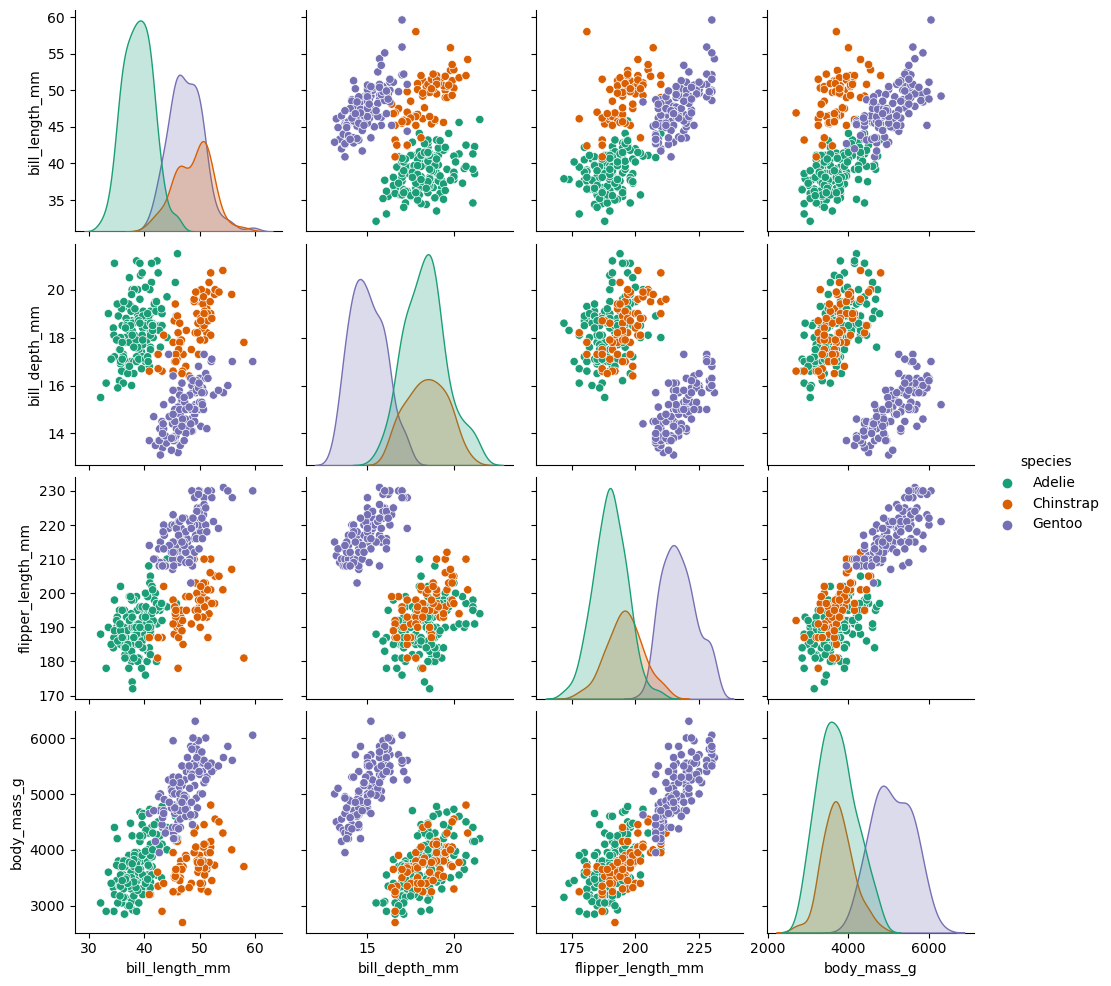

In [3]:
sns.pairplot(penguins, hue='species',palette='Dark2')

# plt.show(sns)

Text(0.5, 1.0, 'Penguins Data')

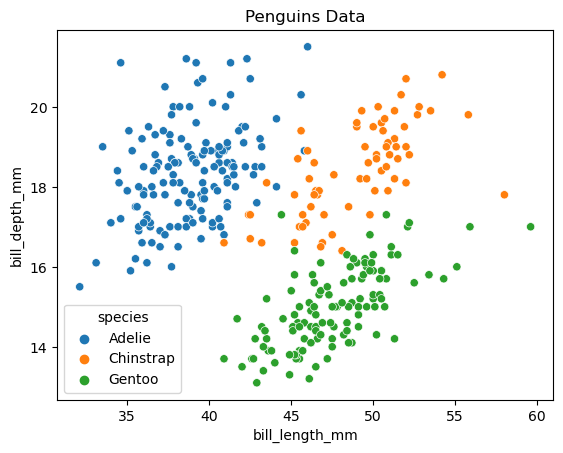

In [4]:
sns.scatterplot(data = penguins, x = "bill_length_mm", y = "bill_depth_mm", hue = 'species').set_title("Penguins Data")
# plt.show()

Scatter plot above suggests that "bill_length_mm" and "bill_depth_mm", are the good predictors of three penguin species.

In [5]:
# Extract features from Penguins Dataset, and convert to numpy array
X = penguins[['bill_length_mm', 'bill_depth_mm']].to_numpy()

# Extract out labels, and convert labels to numpy array
y = penguins['species'].to_numpy()

# Change labels to numeric labels
for i, label in enumerate(y):
    if label == "Adelie":
        y[i] = 0.0
    elif label == "Chinstrap":
        y[i] = 1.0
    else:
        y[i] = 2.0
        
# Change the type of y to meet the needs of the usage of models
y = y.tolist()

## Split into Train and Test data
To implement Sklearn's Random Forest classifier, split the data into "training" and "test" data.

In [6]:
# Use the train_test_split function in sklearn package
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 20)

In [7]:
# Train the training set
clf = RandomForestClassifier(random_state=10)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [8]:
# Predict the test data and calculate the accuracy
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9552238805970149


Random forest has accuracy of 0.96 on the test data which is good. 

Next, compare the random forest outcome with the decision tree outcomes. 

In [9]:
# Set up the decision tree and train the training set
dt_clf = DecisionTreeClassifier(random_state=10)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [10]:
# Predict the test data and calculate the accuracy
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9402985074626866


The random forest slightly outperforms the decision tree on the test data. Thus, in our context random forest performs better than the decision tree. 

However, we are interested in the prediction ability of random forest when it is combined with other prediction models. 

---

### Ensemble learning 2

In the following part, Random forest is combined with Multilayer Perceptron, and Logistic Regression amd hard voting classifier approach is used to identify the best prediction algorithm. The prediction power of individual models are evaluated with the ensemble model.

We use following algorithms from the [sklearn](https://scikit-learn.org) library:

1. RandomForest
2. Logistic Regression 
3. MLPCLassifier 
4. and VotingClassifier to select the algorithm 

In [11]:
# Set up ensemble learners with hard voting classifier
log_clf = LogisticRegression()
mlp_clf = MLPClassifier()
rand_clf = RandomForestClassifier()

voting_clf = VotingClassifier([('lr', log_clf), 
                               ('mlp', mlp_clf), 
                               ('rf', rand_clf)], voting = 'hard')

In [12]:
# Train the training set
voting_clf.fit(X_train, y_train)

c:\Users\ppraveen\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

Compare the prediction accuracy of the three individual models and the ensemble model.

In [13]:
# Fit 3 models and the ensemble model, and print the accuracy
for clf in [log_clf, mlp_clf, rand_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')    

LogisticRegression, accuracy score = 0.9477611940298507
MLPClassifier, accuracy score = 0.8582089552238806


c:\Users\ppraveen\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomForestClassifier, accuracy score = 0.9552238805970149
VotingClassifier, accuracy score = 0.9402985074626866


c:\Users\ppraveen\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In our context, the ensemble model with hard voting classifier has a accuracy slightly lower than the random forest method. Thus, the ensemble method in our case performs worse than individual random forest method. 

---

### Ensemble learning 2

The following part uses multiple decision trees along with bagging strategy.

In [14]:
# Set up the ensemble model
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500, 
                            max_samples=100, 
                            bootstrap = True, 
                            n_jobs = -1)

In [15]:
# Train the training set
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [16]:
# Predict the test data
y_pred = bag_clf.predict(X_test)

# Calculate the accuracy
accuracy_score(y_test, y_pred)

0.9626865671641791

Recall the results of the individual decision tree above, individual decision tree has an accuracy of 0.94 whereas the multiple decision tree has an accuracy of 0.96. Thus, in our context the ensemble model with bagging performs better. 

---

### Ensemble learning 3

In the hard voting classifier approach the MLP has the lowest accuracy among the individual algorithms. Thus, the final part implements MLP with bagging method to evaluates the accuracy of ensemble model with bagging.

In [17]:
# Set up the ensemble model
bag2_clf = BaggingClassifier(MLPClassifier(), 
                             n_estimators=500, 
                             max_samples=100, 
                             bootstrap = True, 
                             n_jobs = -1)

In [18]:
# Train the training set
bag2_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=MLPClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [19]:
# Predict the test data
y_pred = bag_clf.predict(X_test)

# Calculate the accuracy
accuracy_score(y_test, y_pred)

0.9626865671641791

MLP with bagging has an accuracy of 0.96 which is higher than the accuracy of individual MLP model. 

---

## Conclusion

In our context, sometimes individual models performs better and sometimes the ensemble learning model performs better than the individual algorithms. However, this is usually the case. In the meantime, the ensemble learning models are more computationally demanding than the individual models.